# Import

In [46]:
import numpy as np
import pandas as pd
import os
import math

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [57]:
# ÌïúÍ∏Ä Ìè∞Ìä∏Í∞Ä Íπ®ÏßÄÎ©¥ Ïã§ÌñâÌïòÏÑ∏Ïöî! 
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths = None, fontext='ttf')
# ÏïÑÎûò Ï£ºÏÑùÏùÑ ÏßÄÏõåÏÑú Ìè∞Ìä∏ Î¶¨Ïä§Ìä∏Î•º ÌôïÏù∏ÌïòÍ≥† ÌïúÍ∏Ä Ìè∞Ìä∏Î•º font_pathÏóê Ï∂îÍ∞ÄÌï©ÎãàÎã§
fontlist[:]

from matplotlib import font_manager, rc
font_path = 'C:\\Users\\mtang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
#font_path = 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 1. ÏπòÎß§ ÏòàÎ∞©ÏùÑ ÏúÑÌïú ÎùºÏù¥ÌîÑÎ°úÍ∑∏ ÏπòÎß§ Î∂ÑÎ•ò

#### Issue
1. 9Ï≤ú Í∞úÏùò train dataÏóê ÎåÄÌï¥ÏÑúÎßå label(Ï†ïÎãµÍ∞í)Ïù¥ Ï°¥Ïû¨, 3Îßå Í∞úÏùò test dataÏóê ÎåÄÌï¥ÏÑúÎäî Ï°¥Ïû¨x 

**sample data -> data ÏôÄ Ï§ëÎ≥µ! ÌïÑÏöîÏóÜÏùå** 

- acticvity : 1000 x 31 
- sleep : 1000 x 36 
- mmse : 16 x 38

**data : 38,419 x 65**

- train : 9,327 x 65
- test : 29,092 x 65  

**column informations**  
ÌÅ¨Í≤å Í±∏ÏùåÍ±∞Î¶¨, ÏàòÎ©¥, Ïª®Î≤ÑÌåÖ Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎàå Ïàò ÏûàÍ≤†ÏäµÎãàÎã§. 

- feature column (1 -> 0)
    - EMAIL : participants 148 (471 for test) -> drop 
- activity Í±∏ÏùåÍ±∞Î¶¨ (26 -> 24)
    - 2 ~ 28
    - numerical values 
    - 'activity_class_5min', 'activity_met_1min' -> drop (below)
- sleep ÏàòÎ©¥ (31 -> 26)
    - 28 ~ 58
    - 'sleep_is_longest' : all the values are 1, Î≥∏ ÏàòÎ©¥ Ïó¨Î∂Ä
    - 'sleep_temperature_trend_deviation' : all the values are 99.99, ÌîºÎ∂Ä Ïò®ÎèÑ Í≤ΩÌñ• Ìé∏Ï∞®
    - 'sleep_hr_5min', 'sleep_hypnogram_5min', 'sleep_rmssd_5min' -> drop (below)
- converting (5)
    - convert specific columns using 'utf8' 
    - log data, MET log, BLOB ?? 
    - 'activity_class_5min', 'activity_met_1min', 'sleep_hr_5min', 'sleep_hypnogram_5min', 'sleep_rmssd_5min'
    - so, we drop above 5 columns
- time (2 -> 1)
    - summary_date 
    - timezone : ÏãúÍ∞ÑÏû•ÏÜåÏ†ïÎ≥¥, all null -> drop 
    
So we may use 56 columns for training...
  
For more details https://aihub.or.kr/aidata/30749

In [63]:
path = "./Dataset_dementia1/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/1.Í±∏ÏùåÍ±∞Î¶¨/"
activity = pd.read_csv(path + "sample_activity.csv")

path = "./Dataset_dementia1/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/2.ÏàòÎ©¥/"
sleep = pd.read_csv(path + "sample_sleep.csv")

path = "./Dataset_dementia1/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/3.Ïù∏ÏßÄÍ∏∞Îä•/"
mmse = pd.read_csv(path + "sample_mmse.csv")

path = "./Dataset_dementia2/"
train =  pd.read_csv(path + "train.csv")

path = "./Dataset_dementia2/"
label =  pd.read_csv(path + "train_label.csv")

path = "./Dataset_dementia2/"
test =  pd.read_csv(path + "test.csv")

In [14]:
train.head()

EMAIL summary_date  activity_average_met  activity_cal_active  \
0  nia+404@rowan.kr   2020-11-27               1.71875                  730   
1  nia+404@rowan.kr   2020-11-28               1.40625                  342   
2  nia+404@rowan.kr   2020-11-29               1.46875                  401   
3  nia+404@rowan.kr   2020-11-30               0.34375                   27   
4  nia+404@rowan.kr   2020-12-01               1.46875                  333   

   activity_cal_total activity_class_5min  activity_daily_movement  \
0                2944                 ...                    14346   
1                2449                 ...                     6352   
2                2544                 ...                     7297   
3                1850                 ...                      491   
4                2518                 ...                     5861   

   activity_high  activity_inactive  activity_inactivity_alerts  ...  \
0              0                417                           0  ...   
1              0                473                           0  ...   
2              0                586                           0  ...   
3              0                176                           0  ...   
4              0                646                           0  ...   

   sleep_temperature_delta  sleep_temperature_deviation  \
0                    -0.12                        -0.12   
1                    -0.32                        -0.32   
2                     0.07                         0.07   
3                    -0.41                        -0.41   
4                    -0.27                        -0.27   

  sleep_temperature_trend_deviation  timezone  sleep_total  \
0                             99.99       NaN           \r   
1                             99.99       NaN           \r   
2                             99.99       NaN           \r   
3                             99.99       NaN           \r   
4                             99.99       NaN           \r   

             CONVERT(activity_class_5min USING utf8)  \
0  2/1/1/1/1/1/2/2/1/1/1/1/1/1/2/2/2/3/2/2/2/2/2/...   
1  1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/2/...   
2  1/1/1/1/1/1/1/2/1/1/1/1/2/2/2/2/2/1/1/1/1/1/2/...   
3  2/1/2/2/1/2/1/1/2/1/1/1/1/1/2/1/1/1/1/1/2/2/2/...   
4  1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/3/3/2/...   

               CONVERT(activity_met_1min USING utf8)  \
0  0.9/0.9/1.4/1.9/1.1/0.9/0.9/1.1/1.3/1/0.9/1.1/...   
1  1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....   
2  1.1/1.1/1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....   
3  0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/...   
4  0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....   

                   CONVERT(sleep_hr_5min USING utf8)  \
0  0/73/73/73/72/71/70/71/71/71/70/70/73/72/74/74...   
1  69/70/69/69/70/72/71/72/70/69/69/69/68/68/63/6...   
2  0/74/73/73/74/74/74/71/71/70/70/69/70/68/66/69...   
3  73/70/71/72/75/75/73/70/70/70/67/63/63/63/63/6...   
4  0/0/0/0/0/0/0/0/69/69/71/69/65/66/64/64/65/66/...   

            CONVERT(sleep_hypnogram_5min USING utf8)  \
0  4/2/4/3/3/1/2/2/2/2/2/2/3/3/3/4/4/3/2/2/2/2/2/...   
1  2/4/2/2/2/2/3/1/2/2/4/4/2/2/2/2/2/2/2/2/2/2/4/...   
2  4/2/4/4/1/1/1/4/4/4/4/4/4/4/2/3/4/2/2/4/2/2/2/...   
3  4/4/4/4/3/3/3/2/4/4/4/2/2/2/2/2/2/2/2/4/2/2/2/...   
4  4/4/4/4/4/4/4/4/4/4/4/2/2/2/2/3/3/2/4/4/4/2/2/...   

                CONVERT(sleep_rmssd_5min USING utf8)  
0  0/10/10/10/11/11/10/12/18/13/14/12/10/10/18/17...  
1  23/23/26/24/18/13/15/14/17/20/24/30/23/25/22/1...  
2  0/11/14/20/13/14/14/16/27/29/27/20/19/19/14/12...  
3  24/28/19/17/12/10/17/20/23/23/25/31/26/25/34/3...  
4  0/0/0/0/0/0/0/0/21/22/26/23/19/29/22/17/14/13/...  

[5 rows x 65 columns]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9327 entries, 0 to 9326
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   EMAIL                                     9327 non-null   object 
 1   summary_date                              9327 non-null   object 
 2   activity_average_met                      9327 non-null   float64
 3   activity_cal_active                       9327 non-null   int64  
 4   activity_cal_total                        9327 non-null   int64  
 5   activity_class_5min                       9327 non-null   object 
 6   activity_daily_movement                   9327 non-null   int64  
 7   activity_high                             9327 non-null   int64  
 8   activity_inactive                         9327 non-null   int64  
 9   activity_inactivity_alerts                9327 non-null   int64  
 10  activity_low                        

<AxesSubplot:>

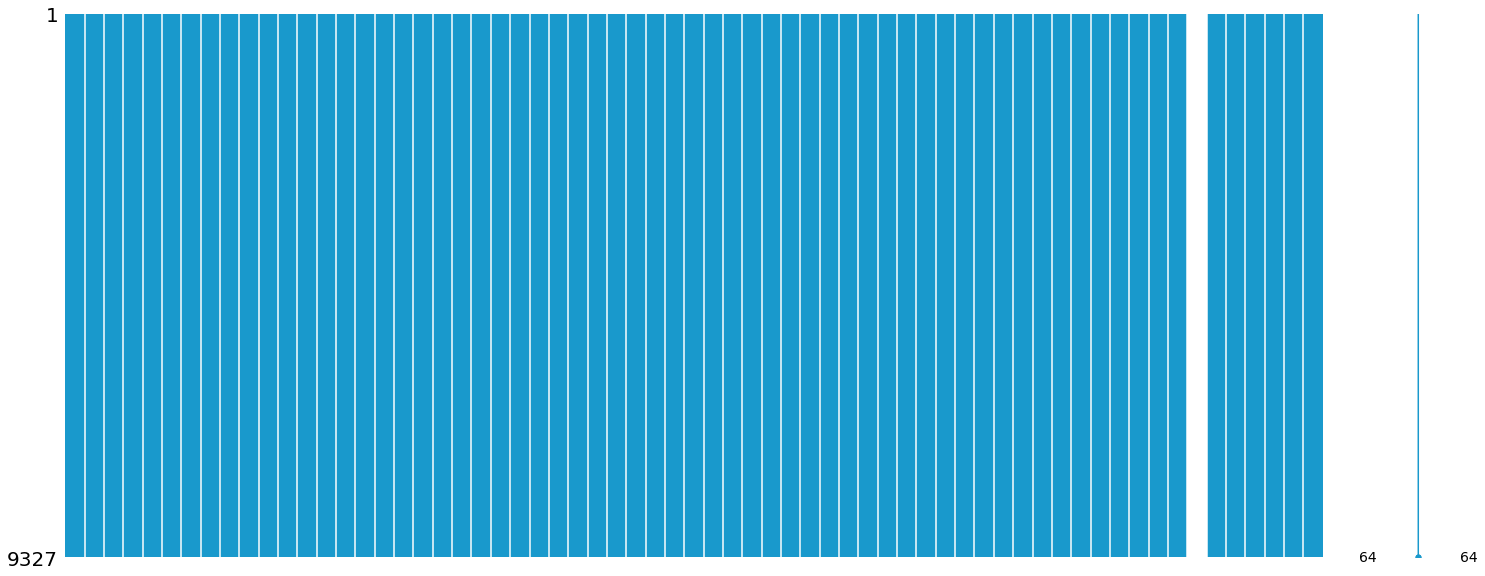

In [59]:
msno.matrix(train.iloc[:, :], color=(0.1, 0.6, 0.8))

In [16]:
train[['activity_class_5min','CONVERT(activity_class_5min USING utf8)']]

activity_class_5min            CONVERT(activity_class_5min USING utf8)
0                    ...  2/1/1/1/1/1/2/2/1/1/1/1/1/1/2/2/2/3/2/2/2/2/2/...
1                    ...  1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/2/...
2                    ...  1/1/1/1/1/1/1/2/1/1/1/1/2/2/2/2/2/1/1/1/1/1/2/...
3                    ...  2/1/2/2/1/2/1/1/2/1/1/1/1/1/2/1/1/1/1/1/2/2/2/...
4                    ...  1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/3/3/2/...
...                  ...                                                ...
9322                 ...  2/1/1/2/2/1/1/1/1/2/2/3/2/1/1/1/1/1/1/1/1/1/1/...
9323                 ...  1/1/1/1/1/1/1/1/1/1/2/3/2/2/2/1/1/1/1/1/1/1/1/...
9324                 ...  1/1/1/1/1/1/2/2/2/2/2/2/1/1/1/1/1/1/1/1/1/1/1/...
9325                 ...  1/1/1/2/3/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...
9326                 ...  1/1/1/1/1/1/1/1/1/1/1/1/2/2/0/0/0/0/0/0/0/0/0/...

[9327 rows x 2 columns]

In [26]:
#col = 'activity_class_5min'
#col = 'activity_met_1min'
#col = 'sleep_hr_5min'
#col = 'sleep_hypnogram_5min'
col = 'sleep_rmssd_5min'
train[col].value_counts()

...    9327
Name: sleep_rmssd_5min, dtype: int64

In [62]:
test.head()

EMAIL summary_date  activity_average_met  activity_cal_active  \
0  nia+075@rowan.kr   2020-10-19              1.738393                627.0   
1  nia+075@rowan.kr   2020-10-20              1.442223                137.0   
2  nia+075@rowan.kr   2020-10-21              1.479700                175.0   
3  nia+075@rowan.kr   2020-10-22              1.069079                217.0   
4  nia+075@rowan.kr   2020-10-23              1.645156                 16.0   

   activity_cal_total activity_class_5min  activity_daily_movement  \
0              2718.0                 ...             17125.461981   
1              2672.0                 ...             11410.099490   
2              2514.0                 ...              5497.769969   
3              2653.0                 ...              3852.789155   
4              2327.0                 ...              4483.044208   

   activity_high  activity_inactive  activity_inactivity_alerts  ...  \
0            0.0              588.0                           1  ...   
1            0.0              544.0                           1  ...   
2            2.0              559.0                           2  ...   
3            0.0              671.0                           0  ...   
4            0.0              767.0                           0  ...   

   sleep_temperature_delta  sleep_temperature_deviation  \
0                -0.022292                    -0.346215   
1                 0.481816                     0.019516   
2                -0.082092                     0.022043   
3                 0.177269                     0.013762   
4                -0.037126                    -0.110565   

  sleep_temperature_trend_deviation  timezone  sleep_total  \
0                             99.99       NaN           \r   
1                             99.99       NaN           \r   
2                             99.99       NaN           \r   
3                             99.99       NaN           \r   
4                             99.99       NaN           \r   

             CONVERT(activity_class_5min USING utf8)  \
0  1/1/1/1/1/1/1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/2/...   
1  1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...   
2  1/1/1/1/1/2/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/1/...   
3  1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...   
4  1/1/1/1/1/2/1/1/2/2/1/1/1/1/1/1/1/1/1/1/1/1/1/...   

               CONVERT(activity_met_1min USING utf8)  \
0  1.4/1.8/1.2/3.9/0.9/0.1/0.9/0.9/1.3/1.2/0.9/0....   
1  1.6/0.9/0.9/1.3/3.9/2.9/0.9/0.9/0.9/1.1/0.9/1/...   
2  1.5/0.9/1.4/0.9/0.9/0.9/3.6/1.5/0.9/0.9/0.9/1....   
3  4.8/1.9/1/1.3/1.4/1.8//2.2/2.1/1.2/1.2/1.2/2.3...   
4  1.9/1.4/1.2/1.3/1.4/1.7/1.2/1/1.8/1.2/0.9/0.9/...   

                   CONVERT(sleep_hr_5min USING utf8)  \
0  71/0/65/64/71/64/0/60/66/69/64/66/61/64/62/66/...   
1  65/56/56/60/59/58/59/58/57/59/62/60/59/56/54/5...   
2  64/0/57/66/52/0/62/0/61/61/0/54/54/52/0/55/64/...   
3  61/61/63/64/59/62/59/60/62/63/58/65/64/61/61/6...   
4  58/0/60/57/60/63/57/55/56/57/57/0//57/58/56/58...   

            CONVERT(sleep_hypnogram_5min USING utf8)  \
0  2/2/3/2/3/1/3/2/4/4/2/2/4/4/3/2/1/2/4//2/4/2/2...   
1  4/3/3/2/1/2/2/1/3/4/2/3/3/1/3/3/1/2/2/2/2/2/3/...   
2  3/1/4/2/2/2/4/4/3/2/2/3/1/2/1/2/3/4/1/2/2/4/2/...   
3  4/1/2/1/4/2/1/2/1/1/2/2/4/4/2/1/2/3/1/3/2/3/4/...   
4  4/4/2/2/4/4/4/4/2/2/2/4/2/1/4/2/4//2/2/4/4/4/4...   

                CONVERT(sleep_rmssd_5min USING utf8)  
0  44/19/19/16/0/20/32/26/13/14/25/17/22/25/17/14...  
1  21/17/23//34/19/17/15/19/19/17/30/29/13/19/21/...  
2  0/21/0/19/53/30/0/27/0/0/70/0/0/44/0/24/31/0/1...  
3  27/20/15/15/16/17/18/22/16/16/16/37/18/18/16/1...  
4  25/33/13/19/14/29/25/19/0/22/0/29/0/37/0/27/0/...  

[5 rows x 65 columns]

In [66]:
# Ï†ïÎãµÍ∞í(label) Ïù¥ train dataÏóê ÎåÄÌï¥ÏÑúÎßå Ï°¥Ïû¨ -> Issue! 
print(train['EMAIL'].nunique())
label

148


SAMPLE_EMAIL DIAG_NM
0    nia+315@rowan.kr      CN
1    nia+220@rowan.kr      CN
2    nia+096@rowan.kr     MCI
3    nia+163@rowan.kr      CN
4    nia+396@rowan.kr      CN
..                ...     ...
143  nia+394@rowan.kr      CN
144  nia+067@rowan.kr     Dem
145  nia+013@rowan.kr     MCI
146  nia+450@rowan.kr      CN
147  nia+287@rowan.kr     Dem

[148 rows x 2 columns]

## dementia 2 

In [24]:
path = "./Dataset_dementia3/"
dementia =  pd.read_csv(path + "dementia_dataset.csv")

In [25]:
dementia

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  1987  0.696  0.883  
1      14  2.0  30.0  0.0  2004  0.681  0.876  
2      12  NaN  23.0  0.5  1678  0.736  1.046  
3      12  NaN  28.0  0.5  1738  0.713  1.010  
4      12  NaN  22.0  0.5  1698  0.701  1.034  
..    ...  ...   ...  ...   ...    ...    ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

In [67]:
path = "./Dataset_alzheimers/"
cross =  pd.read_csv(path + "oasis_cross-sectional.csv")
longitude =  pd.read_csv(path + "oasis_longitudinal.csv")

In [68]:
cross

ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
431  OAS1_0285_MR2   M    R   20   NaN  NaN   NaN  NaN  1469  0.847  1.195   
432  OAS1_0353_MR2   M    R   22   NaN  NaN   NaN  NaN  1684  0.790  1.042   
433  OAS1_0368_MR2   M    R   22   NaN  NaN   NaN  NaN  1580  0.856  1.111   
434  OAS1_0379_MR2   F    R   20   NaN  NaN   NaN  NaN  1262  0.861  1.390   
435  OAS1_0395_MR2   F    R   26   NaN  NaN   NaN  NaN  1283  0.834  1.368   

     Delay  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
..     ...  
431    2.0  
432   40.0  
433   89.0  
434    2.0  
435   39.0  

[436 rows x 12 columns]

In [69]:
longitude

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  1987  0.696  0.883  
1      14  2.0  30.0  0.0  2004  0.681  0.876  
2      12  NaN  23.0  0.5  1678  0.736  1.046  
3      12  NaN  28.0  0.5  1738  0.713  1.010  
4      12  NaN  22.0  0.5  1698  0.701  1.034  
..    ...  ...   ...  ...   ...    ...    ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

## 2. Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤© ÎßûÏ∂îÍ∏∞

**data : 426,880 √ó 26**
  
**column informations**

- feature column (2 -> 0)
    - id 
    - YIN : Vehicle Identification Number (Ï∞®Îüâ ÏãùÎ≥Ñ Î≤àÌò∏)
- Inaccessible variable (4 -> 0)
    - url, region, region_url, img_url
- Continous variable 
    - year(Ïó∞Ïãù), odometer(Ï£ºÌñâÍ±∞Î¶¨)
    - long, lat : but this data from US not Kor
- Categorical variable 
    - manufacturer(Ï†úÏ°∞ÏÇ¨), model(Î™®Îç∏Ï†ïÎ≥¥), cylinders, fuel, transmission(Î≥ÄÏÜçÍ∏∞), drive(Íµ¨ÎèôÏ¢ÖÎ•ò), paint_color, type(Ï∞®ÎüâÏ¢ÖÎ•ò)
    - size : 72% of the data is lost 
    - state(ÏÉÅÏû•ÏÉÅÌÉú?)
    - posting_date(Îì±Î°ùÎÇ†Ïßú) : why this car hasn't been sold for a long time? 
    - title_status(Ï∞®ÎüâÎÇ¥Î∂ÄÏÉÅÌÉú) : clean or not 
- Text variable (1)
    - description
- Null variable (1 -> 0)
    - county : caution! this is not 'country', all the values are null 
- **Y variable (2 -> 1)**
    - price -> Regression
    - price : 32,895 are 0 -> 393,985Í∞ú 
    - condition -> Multi-class Classification (label:6)

So we may use 393,985 x 18 for training...
  
For more details https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [2]:
path = "./Dataset_usedcar/"
car =  pd.read_csv(path + "vehicles.csv")

In [3]:
car.tail(3)

id                                                url  \
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

         region                      region_url  price    year manufacturer  \
426877  wyoming  https://wyoming.craigslist.org  34990  2020.0     cadillac   
426878  wyoming  https://wyoming.craigslist.org  28990  2018.0        lexus   
426879  wyoming  https://wyoming.craigslist.org  30590  2019.0          bmw   

                           model condition    cylinders  ... size       type  \
426877          xt4 sport suv 4d      good          NaN  ...  NaN  hatchback   
426878           es 350 sedan 4d      good  6 cylinders  ...  NaN      sedan   
426879  4 series 430i gran coupe      good          NaN  ...  NaN      coupe   

       paint_color                                          image_url  \
426877       white  https://images.craigslist.org/00L0L_farM7bxnxR...   
426878      silver  https://images.craigslist.org/00z0z_bKnIVGLkDT...   
426879         NaN  https://images.craigslist.org/00Y0Y_lEUocjyRxa...   

                                              description county state  \
426877  Carvana is the safer way to buy a car During t...    NaN    wy   
426878  Carvana is the safer way to buy a car During t...    NaN    wy   
426879  Carvana is the safer way to buy a car During t...    NaN    wy   

              lat       long              posting_date  
426877  33.779214 -84.411811  2021-04-04T03:21:17-0600  
426878  33.786500 -84.445400  2021-04-04T03:21:11-0600  
426879  33.779214 -84.411811  2021-04-04T03:21:07-0600  

[3 rows x 26 columns]

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

<AxesSubplot:>

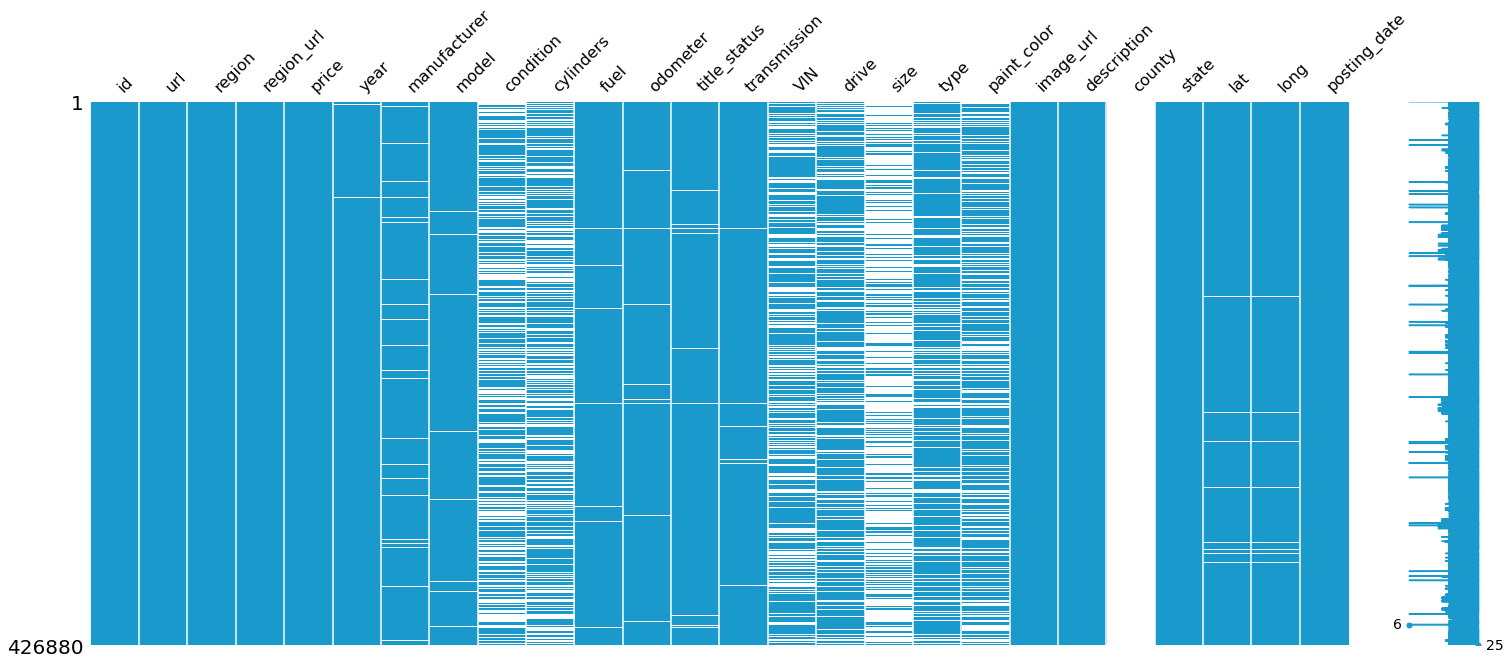

In [5]:
msno.matrix(car.iloc[:, :], color=(0.1, 0.6, 0.8))

In [17]:
state_of_listing = car['description']
state_of_listing.drop_duplicates()

0                                                       NaN
27        Carvana is the safer way to buy a car During t...
28        Carvana is the safer way to buy a car During t...
29        Carvana is the safer way to buy a car During t...
30        Carvana is the safer way to buy a car During t...
                                ...                        
426875    Carvana is the safer way to buy a car During t...
426876    Carvana is the safer way to buy a car During t...
426877    Carvana is the safer way to buy a car During t...
426878    Carvana is the safer way to buy a car During t...
426879    Carvana is the safer way to buy a car During t...
Name: description, Length: 360912, dtype: object

In [15]:
# label = 0Ïõê : 32,895 
len(## 2. Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤© ÎßûÏ∂îÍ∏∞car['price'][car['price'] == 0])

32895

In [26]:
car['condition'].nunique()

6

## 3. ÏßÑÏßú Ï†ÄÏä§Ìã¥ÎπÑÎ≤ÑÎäî ÎàÑÍµ¨?

#### Issue
1. Instagram Graph API (ÎòêÎäî ÌÅ¨Î°§ÎßÅ) ÌïòÎäî Í±∞

**data : 10,319 √ó 13**
  
**column informations**
- feature variable (1 -> 0)
    - urls
- Continous variable (7)
    - From cpations columns or sns info 
    - n_like, n_comments, n_hashtags, n_characters, n_words, n_emojis, n_mentions
- Categorical variable (1) 
    - isvideo : False or True 
- date variable (1)
    - post_dates
- Text variable (1)
    - captions : 2,037 are null
- Image variable (1)
    - display_picture_relative_url
    - we may repalce this column with image data(10,319)
  
- **Y variable (1)**
    - username -> Multi-class Classification (label:5)
    
So we may use 10,319 √ó 11 for training...  
text, image, tabular data
  
For more details https://www.kaggle.com/datasets/aldiandyainf/which-justin-posted-that

In [19]:
path = "./Dataset_celebrity/"
celeb =  pd.read_csv(path + "dataset.csv")

In [21]:
celeb.head()

username                                     urls  post_dates  \
0  justinbieber  https://www.instagram.com/p/CbNn8XPrGZG  1647537136   
1  justinbieber  https://www.instagram.com/p/CbNnwOfLtow  1647537037   
2  justinbieber  https://www.instagram.com/p/CbNmvJErdhZ  1647536503   
3  justinbieber  https://www.instagram.com/p/CbNmjmkLVKg  1647536409   
4  justinbieber  https://www.instagram.com/p/CbLpmoQPga5  1647470898   

  display_picture_relative_url           captions  n_likes  n_comments  \
0       ./imgs/CbNn8XPrGZG.png  üì∑: @evanpaterakis   794012        3406   
1       ./imgs/CbNnwOfLtow.png  üì∑: @evanpaterakis  1172000        4955   
2       ./imgs/CbNmvJErdhZ.png      üì∑ @rorykramer   760049        2952   
3       ./imgs/CbNmjmkLVKg.png     üì∑: @rorykramer  1638370        6703   
4       ./imgs/CbLpmoQPga5.png                NaN  1529572        7517   

   n_hashtags  n_characters  n_words  n_emojis  n_mentions  is_video  
0           0            17        2         1           0     False  
1           0            17        2         1           0     False  
2           0            13        2         1           0     False  
3           0            14        2         1           0     False  
4           0             0        0         0           1     False

In [23]:
celeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319 entries, 0 to 10318
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   username                      10319 non-null  object
 1   urls                          10319 non-null  object
 2   post_dates                    10319 non-null  int64 
 3   display_picture_relative_url  10319 non-null  object
 4   captions                      8282 non-null   object
 5   n_likes                       10319 non-null  int64 
 6   n_comments                    10319 non-null  int64 
 7   n_hashtags                    10319 non-null  int64 
 8   n_characters                  10319 non-null  int64 
 9   n_words                       10319 non-null  int64 
 10  n_emojis                      10319 non-null  int64 
 11  n_mentions                    10319 non-null  int64 
 12  is_video                      10319 non-null  bool  
dtypes: bool(1), int6

<AxesSubplot:>

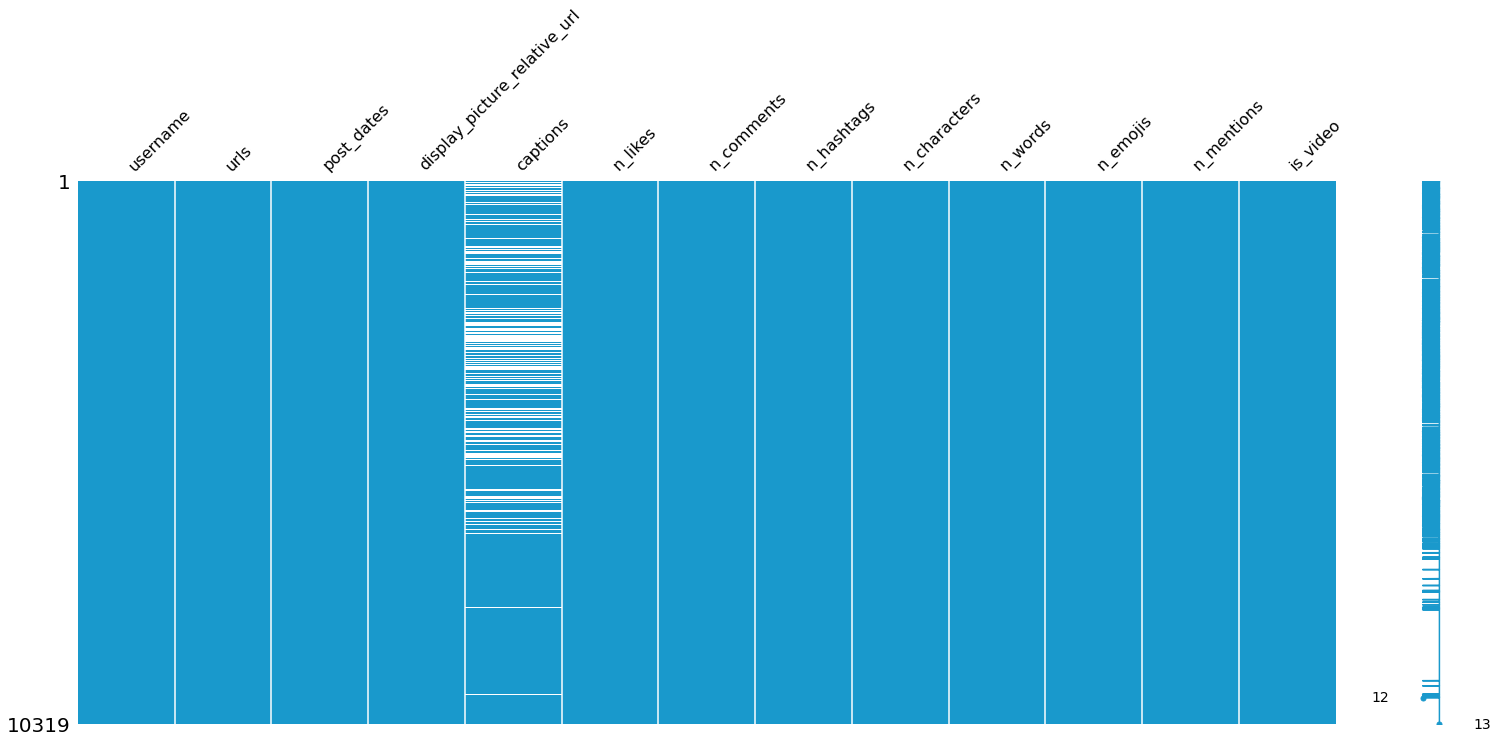

In [24]:
msno.matrix(celeb.iloc[:, :], color=(0.1, 0.6, 0.8))

In [27]:
celeb.username.nunique()

5

In [41]:
#n_likes	n_comments	n_hashtags(15)	n_characters(966)	n_words(292)	n_emojis	n_mentions
celeb.is_video.value_counts()

False    8446
True     1873
Name: is_video, dtype: int64

In [42]:
celeb.captions.isna().sum()

2037

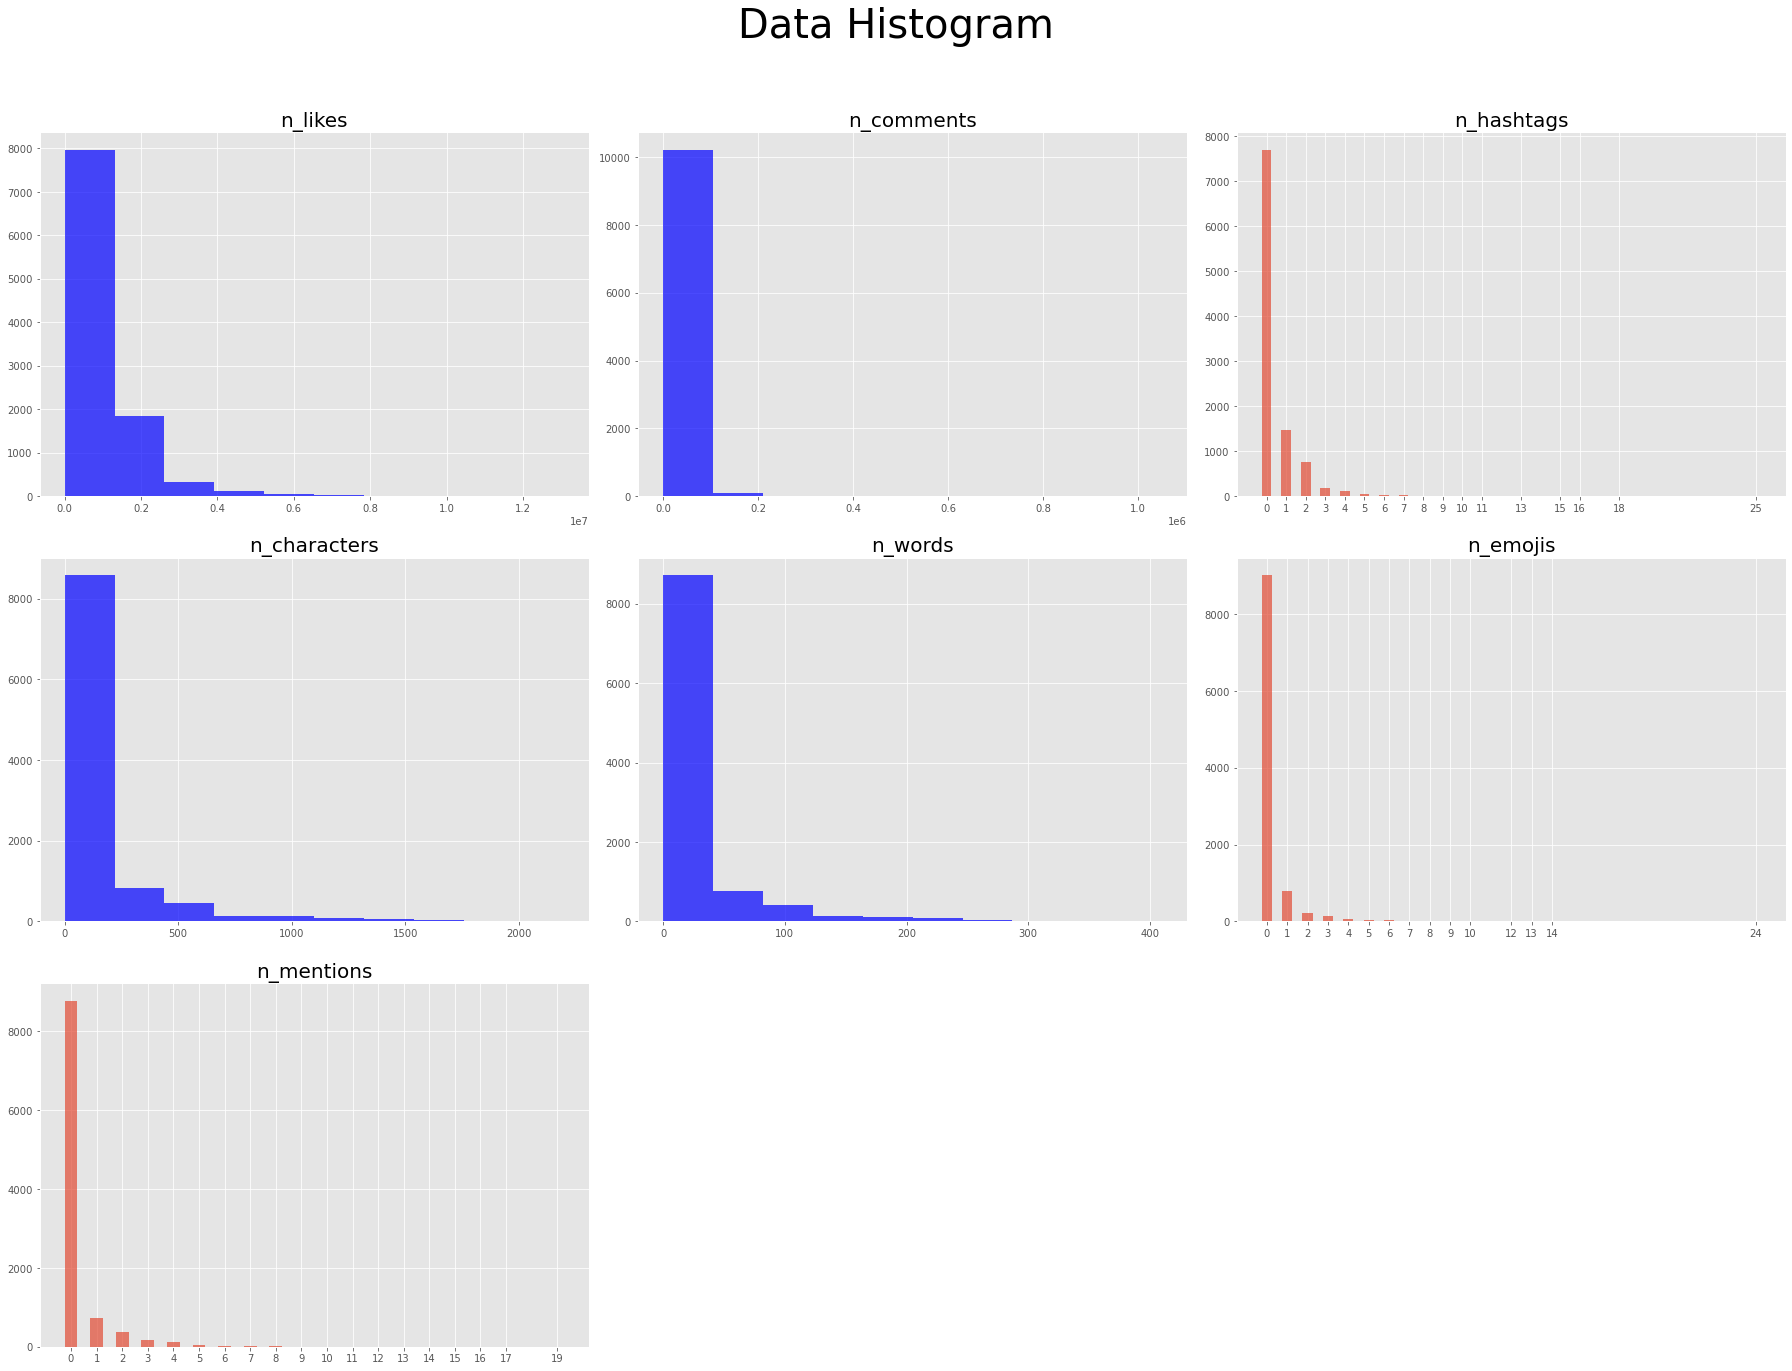

In [44]:
plt.style.use("ggplot")

# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# idÎäî Ï†úÏô∏ÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
cols = ['n_likes', 'n_comments', 'n_hashtags', 'n_characters', 'n_words', 'n_emojis', 'n_mentions']
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(celeb[cols[i]].unique()) > 20:
        plt.hist(celeb[cols[i]], color='b', alpha=0.7)
    else:
        temp = celeb[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 4. ÏÉùÏú° ÌôòÍ≤Ω ÏµúÏ†ÅÌôî Í≤ΩÏßÑÎåÄÌöå 

**data : 12,960 √ó 19 x 75 set**
  
**column informations**
  
- **Y variable (1)**
    - leaf weight -> Regression?? 
    - label csv Îî∞Î°ú Ï°¥Ïû¨
    
So we may use 14,250,000 (75 case x 10,000) for training...  
image, timeseries data...
  
For more details https://dacon.io/competitions/official/235897/data

In [48]:
path = "./Dataset_dacon/train/CASE01/meta"
file_list = os.listdir(path) 

plant_df_list = []
for i in file_list:
    plant_df_list.append(pd.read_csv(path +"/"+ i))

print(type(plant_df_list[0])) 

<class 'pandas.core.frame.DataFrame'>


In [50]:
plant = pd.DataFrame()

for i in plant_df_list:
    plant = pd.concat([plant, i], ignore_index= True)

plant_df.head()

ÏãúÍ∞Ñ  ÎÇ¥Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò    Ïô∏Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò    ÎÇ¥Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò  Ïô∏Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò  CO2Í¥ÄÏ∏°Ïπò  \
0  2021-05-07 02:46     18.6  41.500000  77.599998      NaN   582.0   
1  2021-05-07 02:47     18.6  41.500000  77.699997      0.0   585.0   
2  2021-05-07 02:48     18.6  41.299999  77.800003      0.0   587.0   
3  2021-05-07 02:49     18.5  41.099998  77.800003      0.0   584.0   
4  2021-05-07 02:50     18.6  41.200001  77.800003      0.0   583.0   

       ECÍ¥ÄÏ∏°Ïπò  ÏµúÍ∑ºÎ∂ÑÎ¨¥Îüâ  ÌôîÏù¥Ìä∏ LEDÎèôÏûëÍ∞ïÎèÑ  Î†àÎìú LEDÎèôÏûëÍ∞ïÎèÑ  Î∏îÎ£® LEDÎèôÏûëÍ∞ïÎèÑ  ÎÉâÎ∞©Ïò®ÎèÑ  ÎÉâÎ∞©Î∂ÄÌïò  ÎÇúÎ∞©Ïò®ÎèÑ  \
0  18.600000    0.0        201.0       201.0       201.0  14.0   0.0  15.0   
1  18.799999    0.0        201.0       201.0         0.0  14.0   0.0  15.0   
2  18.700001    0.0        201.0       201.0         NaN  14.0   0.0  15.0   
3  18.799999    0.0        201.0       201.0         0.0  14.0   0.0  15.0   
4  19.100000    0.0        201.0       201.0         0.0  14.0   0.0  15.0   

        ÎÇúÎ∞©Î∂ÄÌïò  Ï¥ùÏ∂îÏ†ïÍ¥ëÎüâ  Î∞±ÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ  Ï†ÅÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ  Ï≤≠ÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ  
0  13.000002    0.0      0.0      0.0      NaN  
1  13.000002    0.0      0.0      0.0      NaN  
2  13.000002    0.0      0.0      0.0      NaN  
3  12.500000    0.0      0.0      0.0      NaN  
4  13.000002    0.0      0.0      0.0      NaN

In [51]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ÏãúÍ∞Ñ           12960 non-null  object 
 1   ÎÇ¥Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò      12957 non-null  float64
 2   Ïô∏Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò      12958 non-null  float64
 3   ÎÇ¥Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò      12958 non-null  float64
 4   Ïô∏Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò      10360 non-null  float64
 5   CO2Í¥ÄÏ∏°Ïπò       12958 non-null  float64
 6   ECÍ¥ÄÏ∏°Ïπò        12958 non-null  float64
 7   ÏµúÍ∑ºÎ∂ÑÎ¨¥Îüâ        12960 non-null  float64
 8   ÌôîÏù¥Ìä∏ LEDÎèôÏûëÍ∞ïÎèÑ  12513 non-null  float64
 9   Î†àÎìú LEDÎèôÏûëÍ∞ïÎèÑ   12502 non-null  float64
 10  Î∏îÎ£® LEDÎèôÏûëÍ∞ïÎèÑ   7741 non-null   float64
 11  ÎÉâÎ∞©Ïò®ÎèÑ         12745 non-null  float64
 12  ÎÉâÎ∞©Î∂ÄÌïò         12745 non-null  float64
 13  ÎÇúÎ∞©Ïò®ÎèÑ         12745 non-null  float64
 14  ÎÇúÎ∞©Î∂ÄÌïò         12744 non-null  float64
 15  Ï¥ùÏ∂îÏ†ïÍ¥ëÎüâ     

<AxesSubplot:>

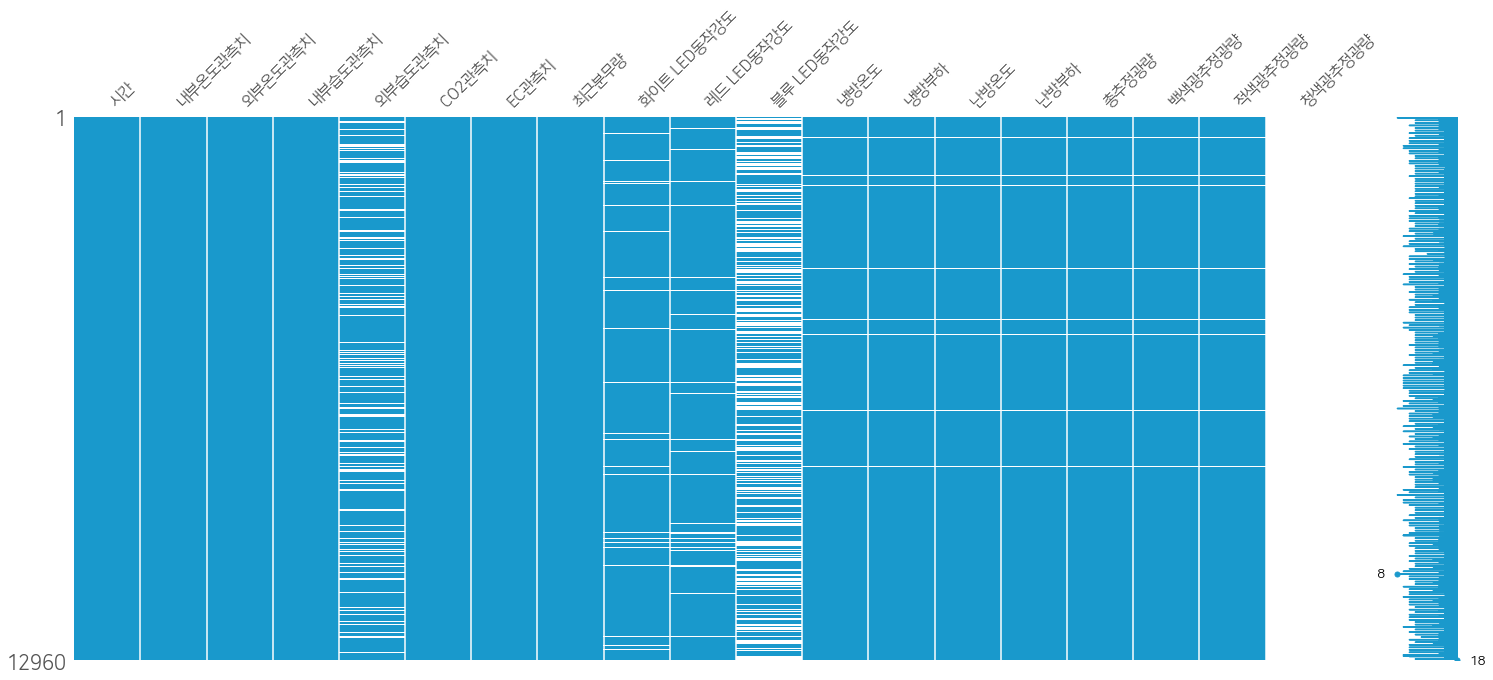

In [59]:
msno.matrix(plant.iloc[:, :], color=(0.1, 0.6, 0.8))

In [52]:
plant.isnull().sum()

ÏãúÍ∞Ñ                 0
ÎÇ¥Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò            3
Ïô∏Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò            2
ÎÇ¥Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò            2
Ïô∏Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò         2600
CO2Í¥ÄÏ∏°Ïπò             2
ECÍ¥ÄÏ∏°Ïπò              2
ÏµúÍ∑ºÎ∂ÑÎ¨¥Îüâ              0
ÌôîÏù¥Ìä∏ LEDÎèôÏûëÍ∞ïÎèÑ      447
Î†àÎìú LEDÎèôÏûëÍ∞ïÎèÑ       458
Î∏îÎ£® LEDÎèôÏûëÍ∞ïÎèÑ      5219
ÎÉâÎ∞©Ïò®ÎèÑ             215
ÎÉâÎ∞©Î∂ÄÌïò             215
ÎÇúÎ∞©Ïò®ÎèÑ             215
ÎÇúÎ∞©Î∂ÄÌïò             216
Ï¥ùÏ∂îÏ†ïÍ¥ëÎüâ            215
Î∞±ÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ          215
Ï†ÅÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ          215
Ï≤≠ÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ        12960
dtype: int64

In [54]:
plant_df.describe()

ÎÇ¥Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò       Ïô∏Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò       ÎÇ¥Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò       Ïô∏Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò        CO2Í¥ÄÏ∏°Ïπò  \
count  12957.000000  12958.000000  12958.000000  10360.000000  12958.000000   
mean      23.315860     55.387977     80.211252      4.559749    493.834465   
std        4.463229     14.523160      3.853566     29.928707    106.669787   
min       16.500000     23.000000     42.799999      0.000000    334.000000   
25%       19.000000     45.599998     78.400002      0.000000    388.000000   
50%       22.500000     55.900002     80.699997      0.000000    495.000000   
75%       27.500000     66.500000     82.900002      0.000000    588.000000   
max       32.099998     89.400002     89.900002    201.000000    684.000000   

              ECÍ¥ÄÏ∏°Ïπò    ÏµúÍ∑ºÎ∂ÑÎ¨¥Îüâ   ÌôîÏù¥Ìä∏ LEDÎèôÏûëÍ∞ïÎèÑ    Î†àÎìú LEDÎèôÏûëÍ∞ïÎèÑ   Î∏îÎ£® LEDÎèôÏûëÍ∞ïÎèÑ  \
count  12958.000000  12960.0  12513.000000  12502.000000  7741.000000   
mean      21.419069      0.0    200.647487    200.727324     0.233691   
std        3.533547      0.0      8.400044      7.389857     6.850058   
min       14.500000      0.0      0.000000      0.000000     0.000000   
25%       18.400000      0.0    201.000000    201.000000     0.000000   
50%       21.000000      0.0    201.000000    201.000000     0.000000   
75%       23.700001      0.0    201.000000    201.000000     0.000000   
max       30.900000      0.0    201.000000    201.000000   201.000000   

               ÎÉâÎ∞©Ïò®ÎèÑ          ÎÉâÎ∞©Î∂ÄÌïò          ÎÇúÎ∞©Ïò®ÎèÑ          ÎÇúÎ∞©Î∂ÄÌïò         Ï¥ùÏ∂îÏ†ïÍ¥ëÎüâ  \
count  12745.000000  12745.000000  12745.000000  12744.000000  12745.000000   
mean      17.416541    179.493030     18.854038     15.967032    145.995394   
std        4.383593    181.177762      4.800930     11.809581    146.310170   
min       14.000000      0.000000     15.000000      0.000000      0.000000   
25%       14.000000      0.000000     15.000000      9.499998      0.000000   
50%       14.000173    111.769200     15.428883     11.999998     95.917100   
75%       23.996412    376.174300     25.996213     21.999998    309.410000   
max       24.000000    401.944700     26.000000     58.484915    309.410000   

            Î∞±ÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ       Ï†ÅÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ  Ï≤≠ÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ  
count  12745.000000  12745.000000      0.0  
mean      12.380553     21.117084      NaN  
std       14.044855     24.020546      NaN  
min        0.000000      0.000000      NaN  
25%        0.000000      0.000000      NaN  
50%        6.619200      6.266000      NaN  
75%       23.167200     48.561500      NaN  
max       47.989200     61.093500      NaN

In [55]:
plant_df.describe(include='O')

ÏãúÍ∞Ñ
count              12960
unique             12960
top     2021-05-09 03:15
freq                   1

array([[<AxesSubplot:title={'center':'ÎÇ¥Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò'}>,
        <AxesSubplot:title={'center':'Ïô∏Î∂ÄÏò®ÎèÑÍ¥ÄÏ∏°Ïπò'}>,
        <AxesSubplot:title={'center':'ÎÇ¥Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò'}>,
        <AxesSubplot:title={'center':'Ïô∏Î∂ÄÏäµÎèÑÍ¥ÄÏ∏°Ïπò'}>],
       [<AxesSubplot:title={'center':'CO2Í¥ÄÏ∏°Ïπò'}>,
        <AxesSubplot:title={'center':'ECÍ¥ÄÏ∏°Ïπò'}>,
        <AxesSubplot:title={'center':'ÏµúÍ∑ºÎ∂ÑÎ¨¥Îüâ'}>,
        <AxesSubplot:title={'center':'ÌôîÏù¥Ìä∏ LEDÎèôÏûëÍ∞ïÎèÑ'}>],
       [<AxesSubplot:title={'center':'Î†àÎìú LEDÎèôÏûëÍ∞ïÎèÑ'}>,
        <AxesSubplot:title={'center':'Î∏îÎ£® LEDÎèôÏûëÍ∞ïÎèÑ'}>,
        <AxesSubplot:title={'center':'ÎÉâÎ∞©Ïò®ÎèÑ'}>,
        <AxesSubplot:title={'center':'ÎÉâÎ∞©Î∂ÄÌïò'}>],
       [<AxesSubplot:title={'center':'ÎÇúÎ∞©Ïò®ÎèÑ'}>,
        <AxesSubplot:title={'center':'ÎÇúÎ∞©Î∂ÄÌïò'}>,
        <AxesSubplot:title={'center':'Ï¥ùÏ∂îÏ†ïÍ¥ëÎüâ'}>,
        <AxesSubplot:title={'center':'Î∞±ÏÉâÍ¥ëÏ∂îÏ†ïÍ¥ëÎüâ'}>],
       [<AxesSubplot:title={'cent

C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


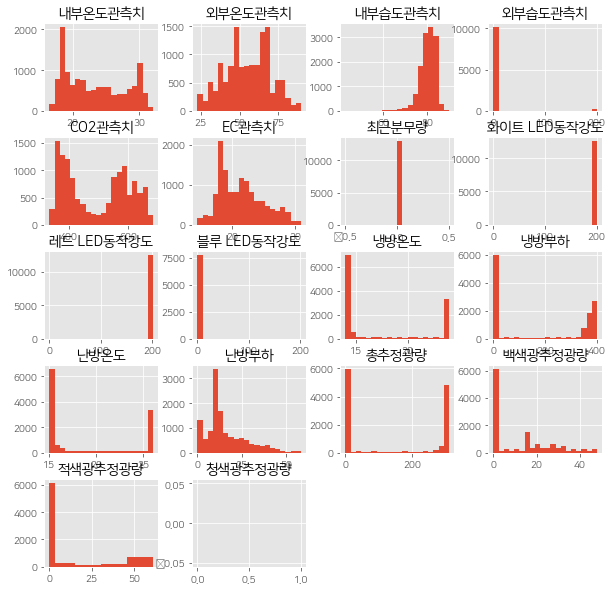

In [58]:
plant_df.hist(bins= 20, figsize =(10,10))